<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Strategies (a)

## Simple Moving Averages

### Data Import

In [52]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [53]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [54]:
raw = pd.read_csv('PQ3.csv',
                  index_col=0, parse_dates=True)

In [55]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2015-01-01 to 2019-12-31
Data columns (total 28 columns):
CHCC      1239 non-null float64
ch_adj    1239 non-null float64
KSE       1239 non-null float64
MCB       1239 non-null float64
OGDC      1239 non-null float64
NML       1239 non-null float64
MLCF      1239 non-null float64
BAFL      1238 non-null float64
BAHL      1239 non-null float64
ABL       1226 non-null float64
UBL       1239 non-null float64
AKBL      1239 non-null float64
DGKC      1239 non-null float64
ENGRO     1239 non-null float64
EFERT     1239 non-null float64
FFCL      1239 non-null float64
FFC       1239 non-null float64
FFBL      1239 non-null float64
FABL      1235 non-null float64
HBL       1239 non-null float64
HACL      1239 non-null float64
INIL      1231 non-null float64
ISL       1238 non-null float64
KOHC      1239 non-null float64
LUCK      1239 non-null float64
MEBL      1209 non-null float64
NBP       1239 non-null float64
PIOC      1

In [73]:
symbol = 'MLCF'

In [74]:
data = (
    pd.DataFrame(raw[symbol])
    .dropna()
)

### Trading Strategy

In [75]:
SMA1 = 42  
SMA2 = 200 

In [76]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()  
data['SMA2'] = data[symbol].rolling(SMA2).mean()  

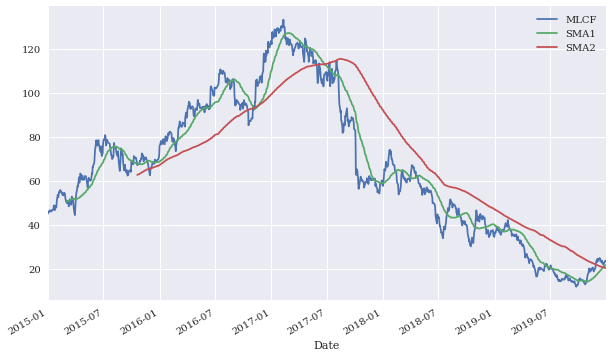

In [77]:
data.plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_01.png')

In [78]:
data.dropna(inplace=True)

In [79]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

In [80]:
data.tail()

,MLCF,SMA1,SMA2,Position
Date,,,,
2019-12-24,22.25,20.849048,20.48305,1
2019-12-26,23.00,21.066429,20.42025,1
2019-12-27,23.25,21.269524,20.36220,1
2019-12-30,23.60,21.468333,20.30310,1
2019-12-31,23.20,21.634524,20.24405,1


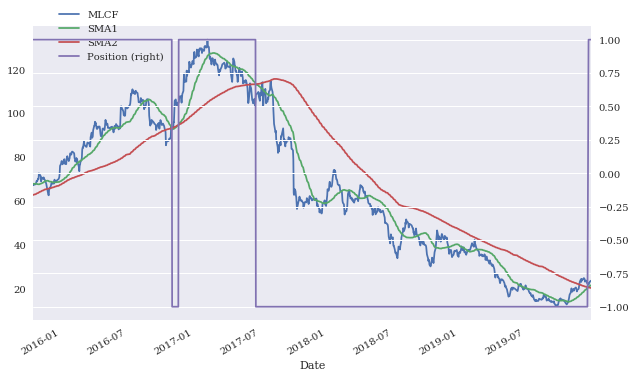

In [81]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

### Vectorized Backtesting

In [93]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))  

In [94]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']  

In [95]:
data.round(4).tail(25)

,MLCF,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2019-11-26,20.00,16.4826,21.9837,-1,0.0141,-0.0141
2019-11-27,20.96,16.6840,21.8992,-1,0.0469,-0.0469
2019-11-28,22.00,16.8940,21.8111,-1,0.0484,-0.0484
2019-11-29,23.10,17.1112,21.7232,-1,0.0488,-0.0488
2019-12-02,24.25,17.3357,21.6454,-1,0.0486,-0.0486
2019-12-03,23.04,17.5260,21.5622,-1,-0.0512,0.0512
2019-12-04,24.32,17.7345,21.4886,-1,0.0541,-0.0541
2019-12-05,23.85,17.9433,21.4048,-1,-0.0195,0.0195
2019-12-06,24.16,18.1698,21.3149,-1,0.0129,-0.0129


In [96]:
data.dropna(inplace=True)

In [97]:
np.exp(data[['Returns', 'Strategy']].sum())  

Returns     0.344163
Strategy    6.665662
dtype: float64

In [98]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5  

Returns     0.416125
Strategy    0.415431
dtype: float64

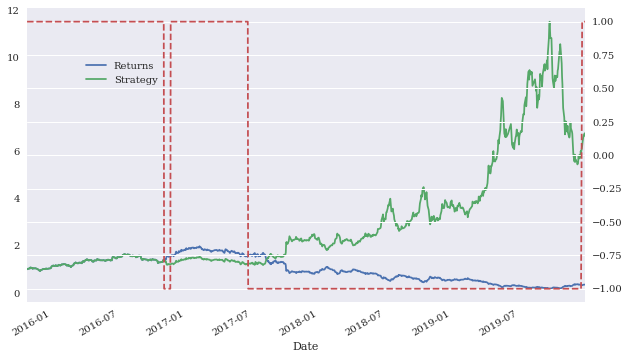

In [99]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

### Optimization

In [100]:
from itertools import product

In [101]:
sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

In [102]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns']},
                 index=[0]), ignore_index=True)  

In [103]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
SMA1        121 non-null int64
SMA2        121 non-null int64
MARKET      121 non-null float64
STRATEGY    121 non-null float64
OUT         121 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [106]:
results.sort_values('OUT', ascending=False).head(25)

,SMA1,SMA2,MARKET,STRATEGY,OUT
112,60,200,0.345598,8.343127,7.997529
83,48,240,0.336183,8.115840,7.779657
82,48,230,0.356211,8.105704,7.749494
71,44,230,0.356211,7.883133,7.526922
104,56,230,0.356211,7.790950,7.434739
91,52,210,0.320088,7.727292,7.407204
105,56,240,0.336183,7.691502,7.355319
90,52,200,0.345598,7.648271,7.302673
60,40,230,0.356211,7.657963,7.301753
101,56,200,0.345598,7.482396,7.136797


## Random Walk Hypothesis

In [107]:
symbol = 'KSE'

In [108]:
data = pd.DataFrame(raw[symbol])

In [109]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data[col] = data[symbol].shift(lag)  
    cols.append(col)  

In [110]:
data.head(7)

,KSE,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2015-01-01,32503.80,NaN,NaN,NaN,NaN,NaN
2015-01-02,32731.61,32503.80,NaN,NaN,NaN,NaN
2015-01-05,32757.79,32731.61,32503.80,NaN,NaN,NaN
2015-01-06,32668.73,32757.79,32731.61,32503.80,NaN,NaN
2015-01-07,32835.94,32668.73,32757.79,32731.61,32503.80,NaN
2015-01-08,33117.47,32835.94,32668.73,32757.79,32731.61,32503.80
2015-01-09,33324.82,33117.47,32835.94,32668.73,32757.79,32731.61


In [111]:
data.dropna(inplace=True)

In [112]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [113]:
reg.round(3)

array([ 1.172, -0.212,  0.025,  0.012,  0.003])

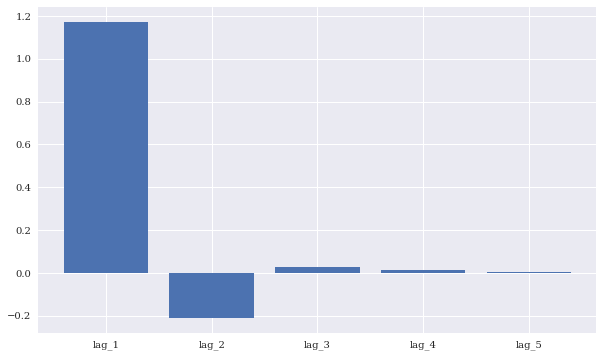

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);
# plt.savefig('../../images/ch15/strat_plot_04.png');

In [115]:
data['Prediction'] = np.dot(data[cols], reg)

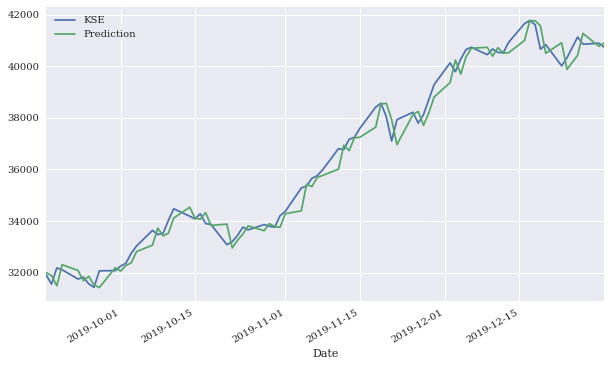

In [116]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_05.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

In [117]:
data

,KSE,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction
Date,,,,,,,
2015-01-08,33117.47,32835.94,32668.73,32757.79,32731.61,32503.80,32869.836399
2015-01-09,33324.82,33117.47,32835.94,32668.73,32757.79,32731.61,33163.079846
2015-01-12,33418.20,33324.82,33117.47,32835.94,32668.73,32757.79,33349.690354
2015-01-13,33371.29,33418.20,33324.82,33117.47,32835.94,32668.73,33424.057789
2015-01-14,33585.75,33371.29,33418.20,33324.82,33117.47,32835.94,33358.286106
...,...,...,...,...,...,...,...
2019-12-24,40328.32,40008.29,40832.99,40655.37,41603.71,41768.66,39876.361226
2019-12-26,41127.79,40328.32,40008.29,40832.99,40655.37,41603.71,40419.350866
2019-12-27,40848.53,41127.79,40328.32,40008.29,40832.99,40655.37,41267.456056
